### Lane detection using hough transforms

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

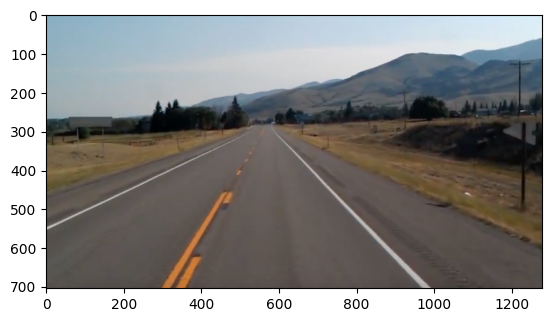

In [4]:
image = cv2.imread("images/road.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

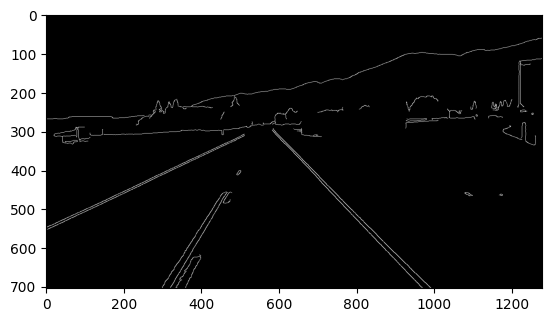

In [6]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)
plt.imshow(edges, cmap="gray")

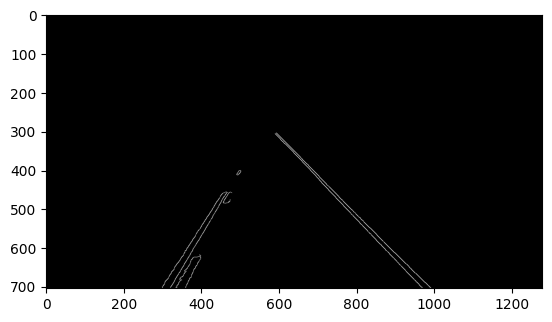

In [7]:
height = edges.shape[0]
polygons = np.array([[(0,height), (1200, height), (600,300)]])
mask = np.zeros_like(edges)
cv2.fillPoly(mask, polygons,255)
cropped= cv2.bitwise_and(edges, mask)

plt.imshow(cropped, cmap="gray")

In [8]:
lines = cv2.HoughLines(cropped, rho=1, theta=np.pi/180, threshold =150)

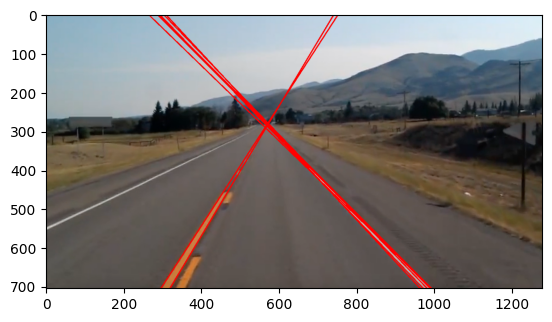

In [9]:
img = np.array(image)
if lines is not None:
    for line in lines:
        arr = np.array(line[0], dtype=np.float64)
        r, theta = arr
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*r
        y0 = b*r
        x1 = int(x0 + 2000*(-b))
        y1 = int(y0 + 2000*(a))
        x2 = int(x0 - 2000*(-b))
        y2 = int(y0 - 2000*(a))

        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
linesP = cv2.HoughLinesP(cropped, 1, np.pi / 180, 100, None, 40, 30)

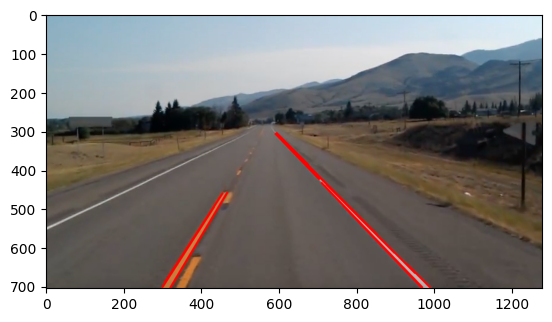

In [11]:
img2 = np.array(image)
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(img2, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))